In [1]:
# data comes from ECDC: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
# alternative source for italy-only data would be this one: https://github.com/pcm-dpc/COVID-19

import pandas as pd
import datetime as dt

try: 
    # see if today's data is available:
    today = dt.datetime.today().strftime('%Y-%m-%d')
    df0 = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'+today+'.xlsx')
except:
    # otherwise get yesterday's data:
    yesterday = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%Y-%m-%d')
    df0 = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'+yesterday+'.xlsx')

df0.head(5)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-04-28   28      4  2020    172       0             Afghanistan    AF   
1 2020-04-27   27      4  2020     68      10             Afghanistan    AF   
2 2020-04-26   26      4  2020    112       4             Afghanistan    AF   
3 2020-04-25   25      4  2020     70       1             Afghanistan    AF   
4 2020-04-24   24      4  2020    105       2             Afghanistan    AF   

  countryterritoryCode  popData2018 continentExp  
0                  AFG   37172386.0         Asia  
1                  AFG   37172386.0         Asia  
2                  AFG   37172386.0         Asia  
3                  AFG   37172386.0         Asia  
4                  AFG   37172386.0         Asia

In [2]:
# remove duplicated values 
df0 = df0[~df0[['dateRep','countriesAndTerritories']].duplicated()]
# pivot
df = df0.pivot(index='dateRep',columns='countriesAndTerritories',values='cases')
df.fillna(0,inplace=True)
df.tail(5)

countriesAndTerritories  Afghanistan  Albania  Algeria  Andorra  Angola  \
dateRep                                                                   
2020-04-24                     105.0     29.0     97.0      1.0     1.0   
2020-04-25                      70.0     15.0    120.0      7.0     0.0   
2020-04-26                     112.0     34.0    129.0      2.0     0.0   
2020-04-27                      68.0     14.0    126.0      7.0     1.0   
2020-04-28                     172.0     10.0    135.0      3.0     1.0   

countriesAndTerritories  Anguilla  Antigua_and_Barbuda  Argentina  Armenia  \
dateRep                                                                      
2020-04-24                    0.0                  0.0      147.0     73.0   
2020-04-25                    0.0                  0.0        0.0     81.0   
2020-04-26                    0.0                  0.0      344.0     69.0   
2020-04-27                    0.0                  0.0        0.0     62.0   
2020-04-28                    0.0                  0.0      223.0     59.0   

countriesAndTerritories  Aruba  ...  United_States_Virgin_Islands  \
dateRep                         ...                                 
2020-04-24                 0.0  ...                           0.0   
2020-04-25                 0.0  ...                           0.0   
2020-04-26                 0.0  ...                           1.0   
2020-04-27                 0.0  ...                           0.0   
2020-04-28                 0.0  ...                           4.0   

countriesAndTerritories  United_States_of_America  Uruguay  Uzbekistan  \
dateRep                                                                  
2020-04-24                                26543.0      8.0        62.0   
2020-04-25                                21352.0      6.0        58.0   
2020-04-26                                48529.0     33.0        29.0   
2020-04-27                                26857.0     10.0        22.0   
2020-04-28                                22541.0     14.0        17.0   

countriesAndTerritories  Venezuela  Vietnam  Western_Sahara  Yemen  Zambia  \
dateRep                                                                      
2020-04-24                    10.0      2.0             0.0    0.0     2.0   
2020-04-25                    20.0      0.0             0.0    0.0     8.0   
2020-04-26                     5.0      0.0             6.0    0.0     0.0   
2020-04-27                     2.0      0.0             0.0    0.0     4.0   
2020-04-28                     4.0      0.0             0.0    0.0     1.0   

countriesAndTerritories  Zimbabwe  
dateRep                            
2020-04-24                    1.0  
2020-04-25                    0.0  
2020-04-26                    2.0  
2020-04-27                    0.0  
2020-04-28                    1.0  

[5 rows x 207 columns]

In [3]:
# select only columns with totals greater than 1000
df2 = df[df.columns[df.sum()>20000]]
df2.sum().sort_values(ascending=False)

countriesAndTerritories
United_States_of_America    988451.0
Spain                       209465.0
Italy                       199414.0
United_Kingdom              157149.0
Germany                     156337.0
France                      128339.0
Turkey                      112261.0
Iran                         91472.0
Russia                       87147.0
China                        83938.0
Brazil                       66501.0
Canada                       48489.0
Belgium                      46687.0
Netherlands                  38245.0
India                        29435.0
Switzerland                  29081.0
Peru                         28699.0
Portugal                     24027.0
Ecuador                      23240.0
dtype: float64

In [4]:
# reorder the columns
df2 = df2[df2.sum().sort_values(ascending=False).index]
df2.tail()

countriesAndTerritories  United_States_of_America   Spain   Italy  \
dateRep                                                             
2020-04-24                                26543.0  2767.0  2646.0   
2020-04-25                                21352.0  2944.0  3021.0   
2020-04-26                                48529.0  1729.0  2357.0   
2020-04-27                                26857.0  1831.0  2324.0   
2020-04-28                                22541.0     0.0  1739.0   

countriesAndTerritories  United_Kingdom  Germany  France  Turkey    Iran  \
dateRep                                                                    
2020-04-24                       4583.0   2337.0  1653.0  3116.0  1030.0   
2020-04-25                       5386.0   2055.0  1773.0  3122.0  1168.0   
2020-04-26                       4913.0   1737.0  1537.0  2861.0  1134.0   
2020-04-27                       4463.0   1018.0   461.0  2357.0  1153.0   
2020-04-28                       4309.0   1144.0  3764.0  2131.0   991.0   

countriesAndTerritories  Russia  China  Brazil  Canada  Belgium  Netherlands  \
dateRep                                                                        
2020-04-24               4774.0    8.0  3735.0  1920.0    908.0        887.0   
2020-04-25               5849.0   15.0  3503.0  1778.0   1496.0        806.0   
2020-04-26               5966.0   10.0  5514.0  1464.0   1032.0        655.0   
2020-04-27               6361.0    3.0  3379.0  1543.0    809.0        655.0   
2020-04-28               6198.0   26.0  4613.0  1605.0    553.0        400.0   

countriesAndTerritories   India  Switzerland    Peru  Portugal  Ecuador  
dateRep                                                                  
2020-04-24               1684.0        228.0  1664.0     371.0    333.0  
2020-04-25               1429.0        181.0   734.0     444.0      0.0  
2020-04-26               1990.0        216.0  3683.0     595.0      0.0  
2020-04-27               1396.0        167.0  2186.0     472.0  11536.0  
2020-04-28               1543.0        103.0  1182.0     163.0    521.0

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
# calculate first and last date to show on plot:
first_date = df2.index.min() + dt.timedelta(days=14)
last_date  = df2.index.max() + dt.timedelta(days=21)
date_range = [first_date,last_date]

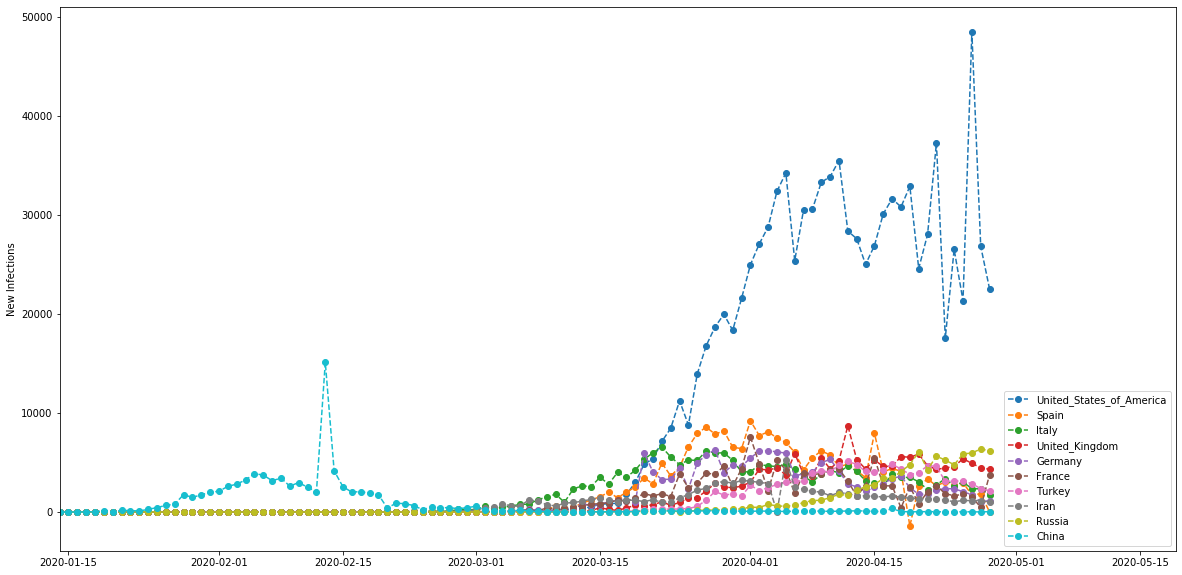

In [6]:
plt.figure(figsize=(20,10))
plt.plot(df2.iloc[:,:10],'o--')
plt.ylabel("New Infections")
plt.xlim(date_range)
plt.legend(df2.columns.values,loc=4);

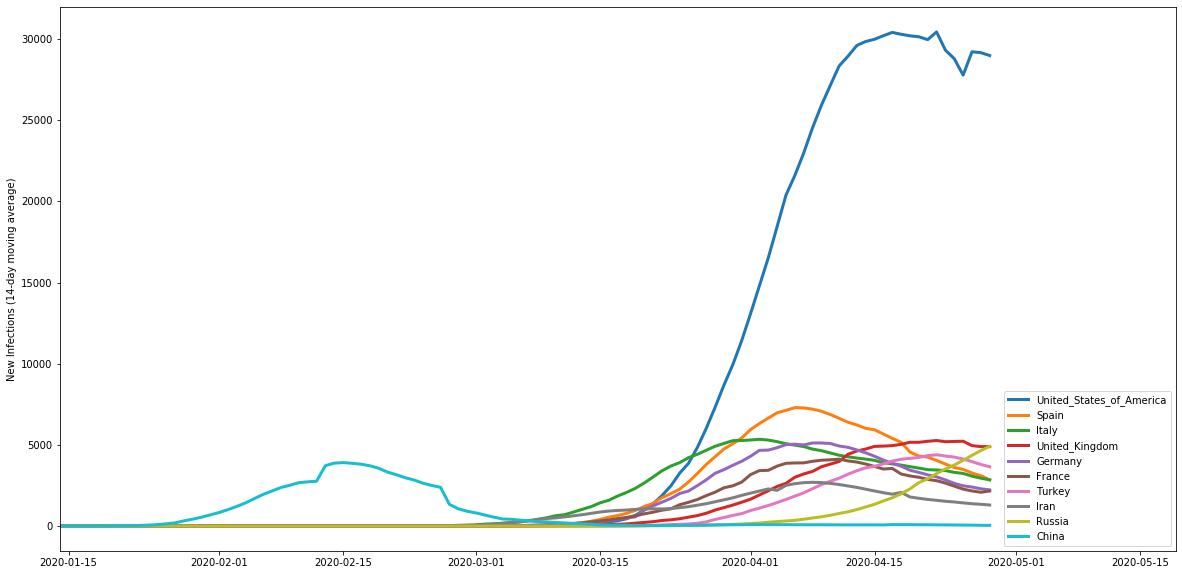

In [7]:
plt.figure(figsize=(20,10))
plt.plot(df2.iloc[:,:10].rolling(window=14).mean(),linewidth=3)
plt.ylabel("New Infections (14-day moving average)")
plt.xlim(date_range)
plt.legend(df2.columns.values,loc=4);

In [8]:
# now let's look at the cummulative infection data
df2cum = df2.cumsum()
df2cum.tail()

countriesAndTerritories  United_States_of_America     Spain     Italy  \
dateRep                                                                 
2020-04-24                               869172.0  202961.0  189973.0   
2020-04-25                               890524.0  205905.0  192994.0   
2020-04-26                               939053.0  207634.0  195351.0   
2020-04-27                               965910.0  209465.0  197675.0   
2020-04-28                               988451.0  209465.0  199414.0   

countriesAndTerritories  United_Kingdom   Germany    France    Turkey  \
dateRep                                                                 
2020-04-24                     138078.0  150383.0  120804.0  101790.0   
2020-04-25                     143464.0  152438.0  122577.0  104912.0   
2020-04-26                     148377.0  154175.0  124114.0  107773.0   
2020-04-27                     152840.0  155193.0  124575.0  110130.0   
2020-04-28                     157149.0  156337.0  128339.0  112261.0   

countriesAndTerritories     Iran   Russia    China   Brazil   Canada  Belgium  \
dateRep                                                                         
2020-04-24               87026.0  62773.0  83884.0  49492.0  42099.0  42797.0   
2020-04-25               88194.0  68622.0  83899.0  52995.0  43877.0  44293.0   
2020-04-26               89328.0  74588.0  83909.0  58509.0  45341.0  45325.0   
2020-04-27               90481.0  80949.0  83912.0  61888.0  46884.0  46134.0   
2020-04-28               91472.0  87147.0  83938.0  66501.0  48489.0  46687.0   

countriesAndTerritories  Netherlands    India  Switzerland     Peru  Portugal  \
dateRep                                                                         
2020-04-24                   35729.0  23077.0      28414.0  20914.0   22353.0   
2020-04-25                   36535.0  24506.0      28595.0  21648.0   22797.0   
2020-04-26                   37190.0  26496.0      28811.0  25331.0   23392.0   
2020-04-27                   37845.0  27892.0      28978.0  27517.0   23864.0   
2020-04-28                   38245.0  29435.0      29081.0  28699.0   24027.0   

countriesAndTerritories  Ecuador  
dateRep                           
2020-04-24               11183.0  
2020-04-25               11183.0  
2020-04-26               11183.0  
2020-04-27               22719.0  
2020-04-28               23240.0

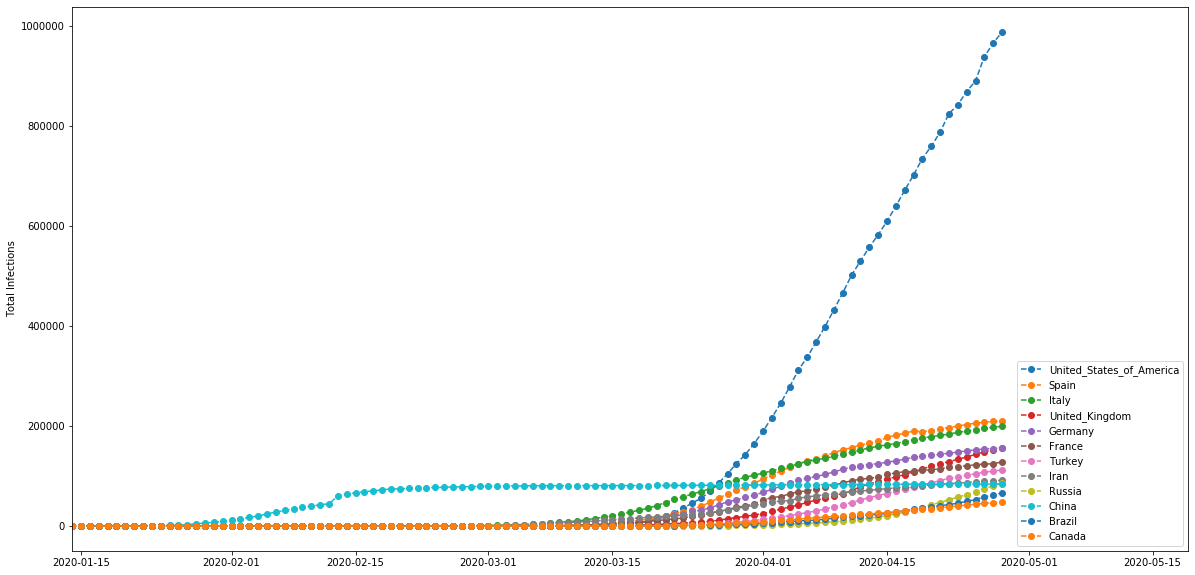

In [9]:
plt.figure(figsize=(20,10))
plt.plot(df2cum.iloc[:,:12],'o--')
plt.ylabel("Total Infections")
plt.xlim(date_range)
plt.legend(df2cum.columns.values,loc=4);

(0, 250000)

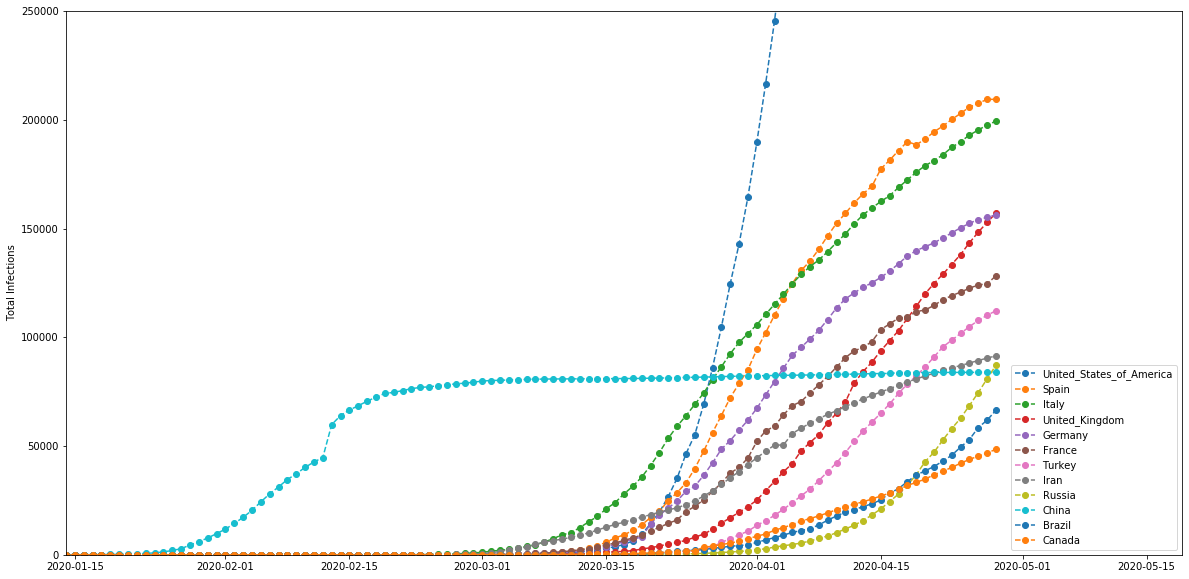

In [10]:
# zoom in the y-axis
plt.figure(figsize=(20,10))
plt.plot(df2cum.iloc[:,:12],'o--')
plt.ylabel("Total Infections")
plt.xlim(date_range)
plt.legend(df2cum.columns.values,loc=4)
plt.ylim([0,250000])

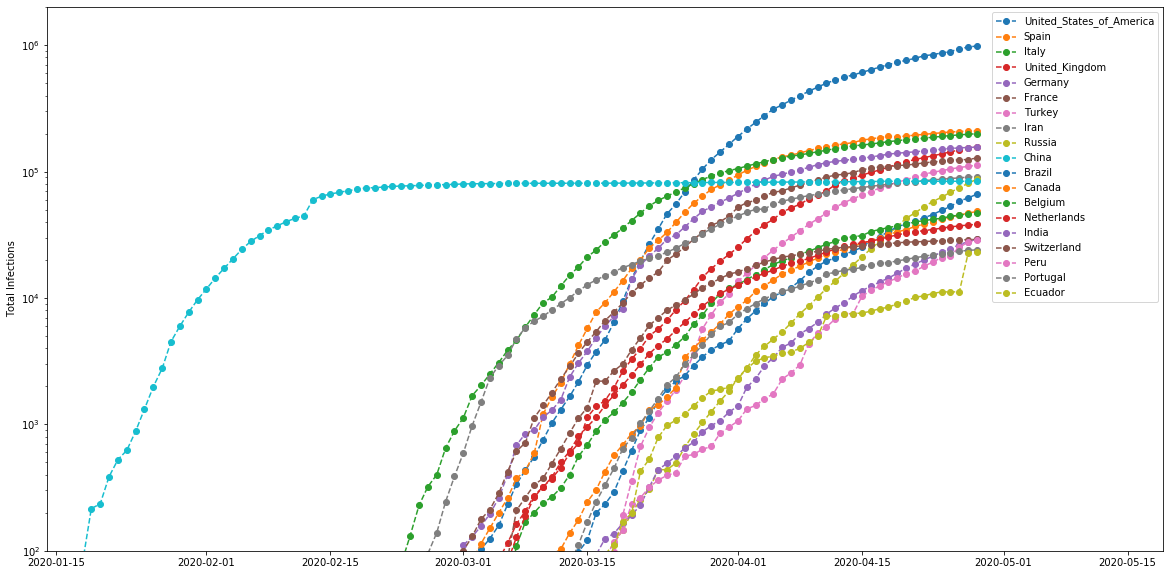

In [11]:
# plot on a logarithmic scale
plt.figure(figsize=(20,10))
plt.yscale('log')
plt.ylim([100,2000000])
plt.ylabel("Total Infections")
plt.plot(df2cum.iloc[:,:32],'o--')
plt.xlim(date_range)
plt.legend(df2cum.columns.values);

In [12]:
# now look at the mortality data
df_deaths = df0.pivot(index='dateRep',columns='countriesAndTerritories',values='deaths')
df_deaths.fillna(0,inplace=True)
df_deaths = df_deaths[df_deaths.columns[df_deaths.sum()>100]]
df_deaths = df_deaths[df_deaths.sum().sort_values(ascending=False).index]
df_deaths.tail(7)

countriesAndTerritories  United_States_of_America  Italy  France  Spain  \
dateRep                                                                   
2020-04-22                                 2524.0  534.0   531.0  435.0   
2020-04-23                                 1721.0  437.0   544.0  440.0   
2020-04-24                                 3179.0  464.0   516.0  367.0   
2020-04-25                                 1054.0  420.0   389.0  378.0   
2020-04-26                                 2172.0  415.0   369.0  288.0   
2020-04-27                                 1687.0  260.0   242.0    0.0   
2020-04-28                                 1369.0  333.0   437.0    0.0   

countriesAndTerritories  United_Kingdom  Belgium  Germany  Iran  China  \
dateRep                                                                  
2020-04-22                        828.0    170.0    281.0  88.0    0.0   
2020-04-23                        763.0    264.0    215.0  94.0    0.0   
2020-04-24                        638.0    228.0    227.0  90.0    0.0   
2020-04-25                        768.0    189.0    179.0  93.0    0.0   
2020-04-26                        813.0    238.0    140.0  76.0    0.0   
2020-04-27                        413.0    177.0    110.0  60.0    1.0   
2020-04-28                        360.0    113.0    163.0  96.0    0.0   

countriesAndTerritories  Brazil  ...  Argentina  Finland  Norway  Panama  \
dateRep                          ...                                       
2020-04-22                166.0  ...        9.0     43.0     9.0     5.0   
2020-04-23                165.0  ...        8.0      8.0     6.0     3.0   
2020-04-24                407.0  ...        6.0     23.0    11.0     2.0   
2020-04-25                357.0  ...        2.0      5.0    11.0     8.0   
2020-04-26                346.0  ...       18.0      9.0     2.0     5.0   
2020-04-27                189.0  ...        1.0      4.0     0.0     6.0   
2020-04-28                338.0  ...       11.0      3.0     0.0     2.0   

countriesAndTerritories  Morocco  Serbia  Bangladesh  Saudi_Arabia  Greece  \
dateRep                                                                      
2020-04-22                   2.0     0.0         9.0           6.0     5.0   
2020-04-23                   4.0     9.0        10.0           5.0     0.0   
2020-04-24                   6.0     5.0         7.0           7.0     4.0   
2020-04-25                   3.0     5.0         4.0           6.0     5.0   
2020-04-26                   1.0     7.0         9.0           9.0     0.0   
2020-04-27                   2.0     5.0         5.0           3.0     0.0   
2020-04-28                   1.0     6.0         7.0           5.0     6.0   

countriesAndTerritories  Moldova  
dateRep                           
2020-04-22                   3.0  
2020-04-23                   3.0  
2020-04-24                   4.0  
2020-04-25                   7.0  
2020-04-26                   7.0  
2020-04-27                   2.0  
2020-04-28                   6.0  

[7 rows x 50 columns]

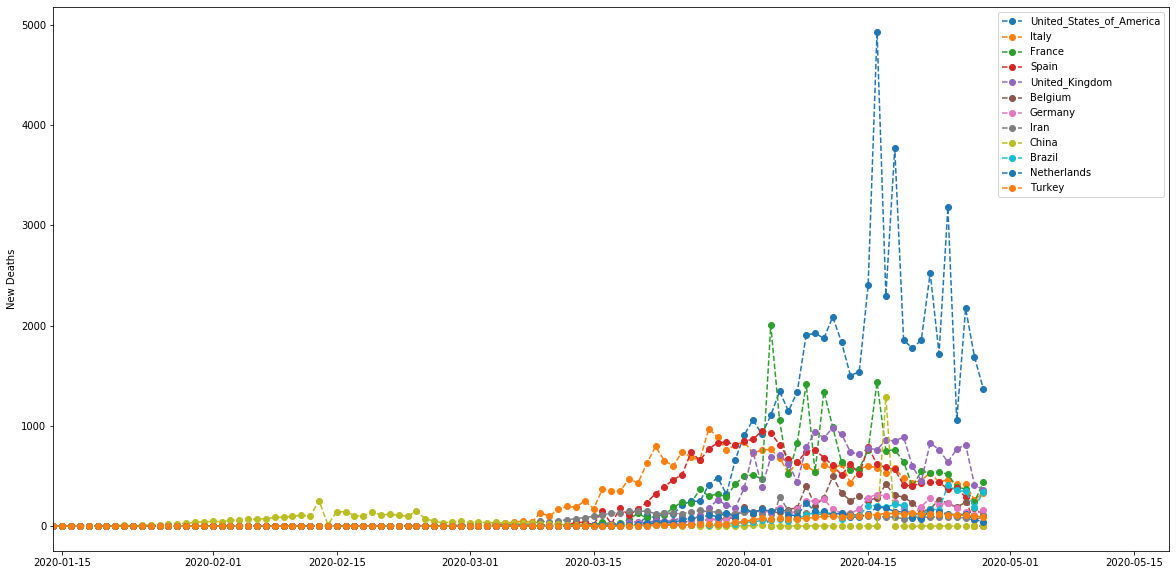

In [13]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths.iloc[:,:12],'o--')
plt.ylabel("New Deaths")
plt.xlim(date_range)
plt.legend(df_deaths.columns.values,loc=1);

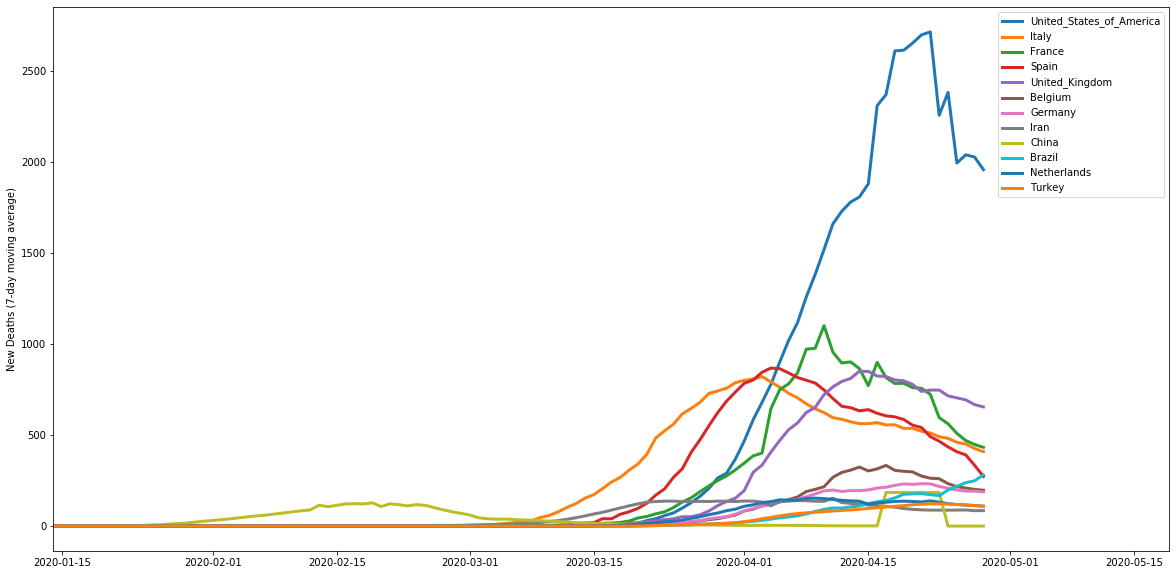

In [14]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths.iloc[:,:12].rolling(window=7).mean(),linewidth=3)
plt.ylabel("New Deaths (7-day moving average)")
plt.xlim(date_range)
plt.legend(df_deaths.columns.values,loc=1);

In [15]:
df_deaths_cum = df_deaths.cumsum()
df_deaths_cum.tail()

countriesAndTerritories  United_States_of_America    Italy   France    Spain  \
dateRep                                                                        
2020-04-24                                49963.0  25549.0  21856.0  22524.0   
2020-04-25                                51017.0  25969.0  22245.0  22902.0   
2020-04-26                                53189.0  26384.0  22614.0  23190.0   
2020-04-27                                54876.0  26644.0  22856.0  23190.0   
2020-04-28                                56245.0  26977.0  23293.0  23190.0   

countriesAndTerritories  United_Kingdom  Belgium  Germany    Iran   China  \
dateRep                                                                     
2020-04-24                      18738.0   6490.0   5321.0  5481.0  4636.0   
2020-04-25                      19506.0   6679.0   5500.0  5574.0  4636.0   
2020-04-26                      20319.0   6917.0   5640.0  5650.0  4636.0   
2020-04-27                      20732.0   7094.0   5750.0  5710.0  4637.0   
2020-04-28                      21092.0   7207.0   5913.0  5806.0  4637.0   

countriesAndTerritories  Brazil  ...  Argentina  Finland  Norway  Panama  \
dateRep                          ...                                       
2020-04-24               3313.0  ...      165.0    172.0   180.0   146.0   
2020-04-25               3670.0  ...      167.0    177.0   191.0   154.0   
2020-04-26               4016.0  ...      185.0    186.0   193.0   159.0   
2020-04-27               4205.0  ...      186.0    190.0   193.0   165.0   
2020-04-28               4543.0  ...      197.0    193.0   193.0   167.0   

countriesAndTerritories  Morocco  Serbia  Bangladesh  Saudi_Arabia  Greece  \
dateRep                                                                      
2020-04-24                 155.0   139.0       127.0         121.0   125.0   
2020-04-25                 158.0   144.0       131.0         127.0   130.0   
2020-04-26                 159.0   151.0       140.0         136.0   130.0   
2020-04-27                 161.0   156.0       145.0         139.0   130.0   
2020-04-28                 162.0   162.0       152.0         144.0   136.0   

countriesAndTerritories  Moldova  
dateRep                           
2020-04-24                  80.0  
2020-04-25                  87.0  
2020-04-26                  94.0  
2020-04-27                  96.0  
2020-04-28                 102.0  

[5 rows x 50 columns]

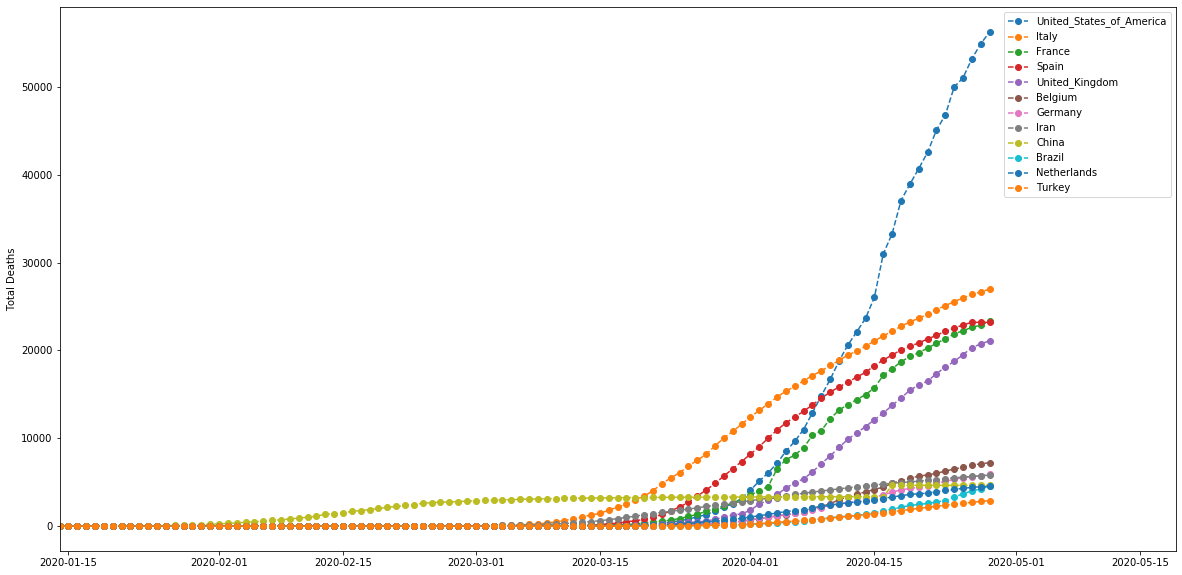

In [16]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum.iloc[:,:12],'o--')
plt.ylabel("Total Deaths")
plt.xlim(date_range)
plt.legend(df_deaths_cum.columns.values,loc=1);

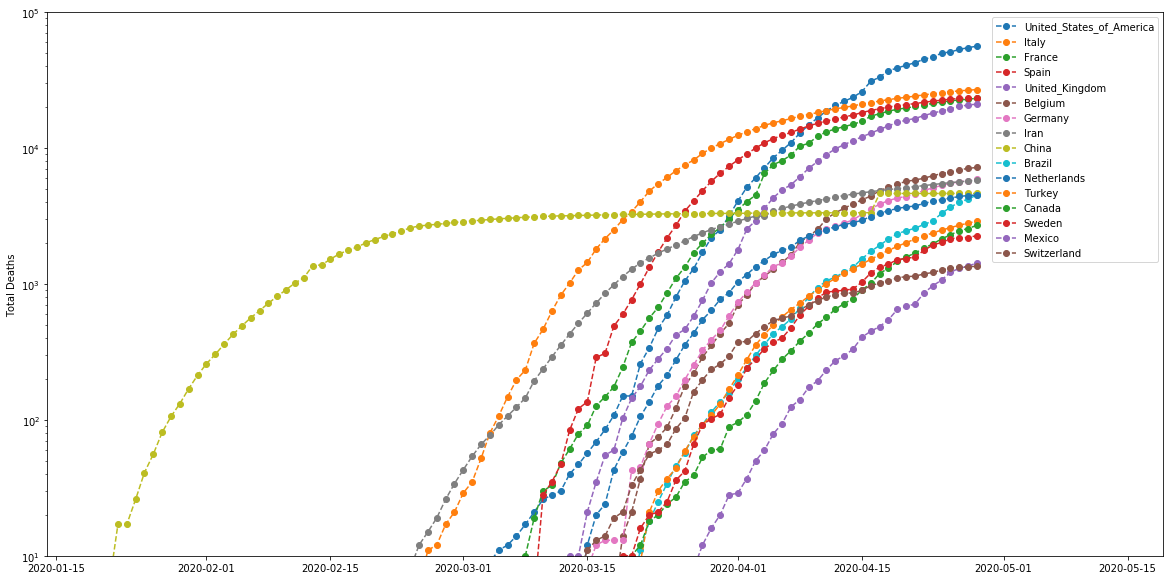

In [17]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum.iloc[:,:16],'o--')
plt.yscale('log')
plt.ylim([10,100000])
plt.ylabel("Total Deaths")
plt.xlim(date_range)
plt.legend(df_deaths_cum.columns.values, loc=1);

In [18]:
# calculate delay after China to reach 20 deaths: 
china_date = df_deaths_cum['China'].gt(19).idxmax()
df_delay = (df_deaths_cum.gt(19).idxmax() - china_date)
df_delay.sort_values(ascending=True).head()

countriesAndTerritories
China                       0 days
Iran                       35 days
Italy                      36 days
South_Korea                38 days
United_States_of_America   45 days
dtype: timedelta64[ns]

In [19]:
# shift all of the countries to the same start date: 
df_deaths_cum_shifted = df_deaths_cum.copy()
for col in list(df_deaths_cum_shifted):
    df_deaths_cum_shifted[col] = df_deaths_cum_shifted[col].shift(-df_delay[col].days)

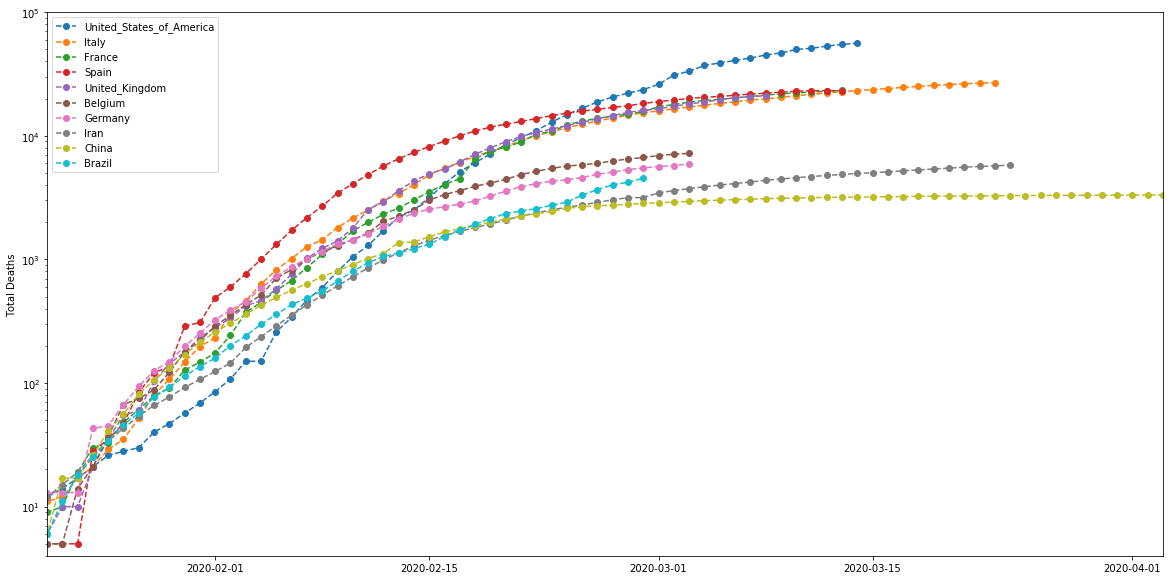

In [20]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum_shifted.iloc[:,:10],'o--')
plt.yscale('log')
plt.ylim([4,100000])
plt.ylabel("Total Deaths")
plt.xlim([china_date - dt.timedelta(days=3), china_date + dt.timedelta(days=70)])
plt.legend(df_deaths_cum.columns.values, loc=0);

In [21]:
# now let's have a look at the data for Italy to see if we can predict it going forward

import numpy as np
italy = df_deaths_cum['Italy']
italy = italy[italy > 20]
xdata = np.array(range(len(italy)))
ydata = np.array(italy,dtype=np.float128)

In [22]:
#see https://en.wikipedia.org/wiki/Generalised_logistic_function
def generalised_logistic(x, a, b, c, d, e):
     y = a / np.power(1 + b*np.exp(-c*(x+d)),1/e)
     #y = a / np.power(np.abs(1 + b*np.exp(-c*(x+d))),1/e)
     return y

# TODO: it might also be worth trying the even more general version of the equation: 
def generalised_logistic_2(x, a, b, c, d, e, f, g):
     y = a / np.power(f + b * np.exp( -c * (x + d) ),1/e) + g
     return y

In [23]:
# now let's fit the curve
from scipy.optimize import curve_fit

# reduce the importance of older data by an exponential decay factor:
decay = .92
# TODO: this value should be set empirically to minimise the forecast errors up to the current time 

# restrict the range of parameter values with upper and lower bounds
bounds =([0, 0, 0, -np.inf, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])

# initial parameter settings (these were set after a bit of playing around with the data)
p0=[2*ydata.max(), 10, .1, 0.0, 1.0]

# estimate the model:
popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=False, bounds=bounds, p0=p0, maxfev=10000)

# print the parameters along with their error estimates
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(suppress=True)
print("parameter estimates: ", popt)
print("standard error:      ", np.sqrt(np.diag(pcov)))

parameter estimates:  [34036.90208962   536.24912124     0.05537019   232.75881291     0.00022361]
standard error:       [  522.42664218 12173.14352748     0.00313955  5368.68200701     0.06992326]


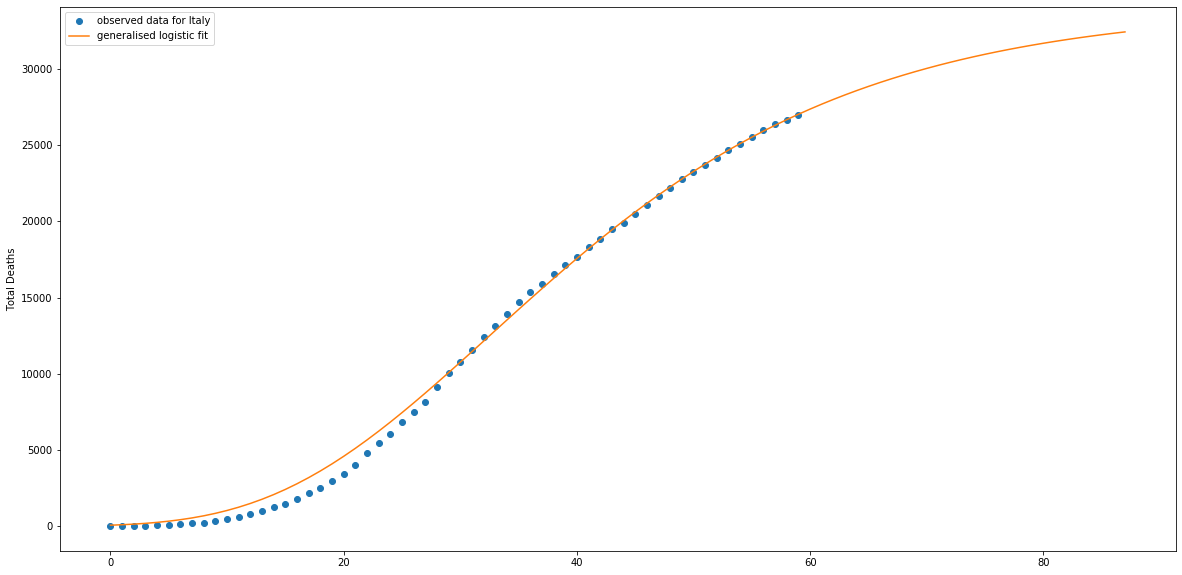

In [24]:
# plot the predictions

plt.figure(figsize=(20,10))
plt.plot(xdata, ydata, 'o', label='observed data for Italy')
xpred = range(len(ydata)+28)
ypred = generalised_logistic(xpred, *popt)
plt.plot(xpred, ypred, label='generalised logistic fit')
plt.legend(loc='best')
plt.ylabel("Total Deaths");

In [25]:
# calculate the RMSE for the fit
error = ydata - generalised_logistic(xdata, *popt)
sse = np.power(error,2).sum()
mse = sse/len(error)
rmse = np.sqrt(mse)
rmse

508.33721192892815285

In [26]:
# calculate confidence bands using the delta-method:

# 1) use sympy to find gradient of function
from sympy import symbols,exp,lambdify

x, a, b, c, d, e = symbols('x a b c d e')
y = a / (1 + b*exp(-c*(x+d)))**(1/e)
dy_da = lambdify([x,[a,b,c,d,e]],y.diff(a))
dy_db = lambdify([x,[a,b,c,d,e]],y.diff(b))
dy_dc = lambdify([x,[a,b,c,d,e]],y.diff(c))
dy_dd = lambdify([x,[a,b,c,d,e]],y.diff(d))
dy_de = lambdify([x,[a,b,c,d,e]],y.diff(e))

def gradient(x, params):
    return [dy_da(x,params),dy_db(x,params),dy_dc(x,params),dy_dd(x,params),dy_de(x,params)] 

# 2) multiply gradient by covariance to compute variance of prediction \hat{y}
def variance_in_y_hat(x, params, cov):
    g = np.array(gradient(x,params)) 
    return g.dot(cov).dot(g)

# 3) scale by estimated standard deviation by critical value 1.96 to get 95% confidence interval
c = 1.96
intervals = [c * np.sqrt(variance_in_y_hat(x,popt,pcov)) for x in xpred]

# 4) finally, for a prediction interval, we need also to take into account the variance in y itself, (not just in \hat{y}), so add mse
intervals = [c * np.sqrt(variance_in_y_hat(x,popt,pcov) + mse) for x in xpred]

# TODO: improve these prediction bands: 
# (1) use the 95% critical value from t-distribution rather than gaussian (with  degree of freedom df=n-5), and sse/df instead of mse
# (2) check whether bounds need to increase with # steps into future
# (3) compare with bootstrap based estimates for the bounds

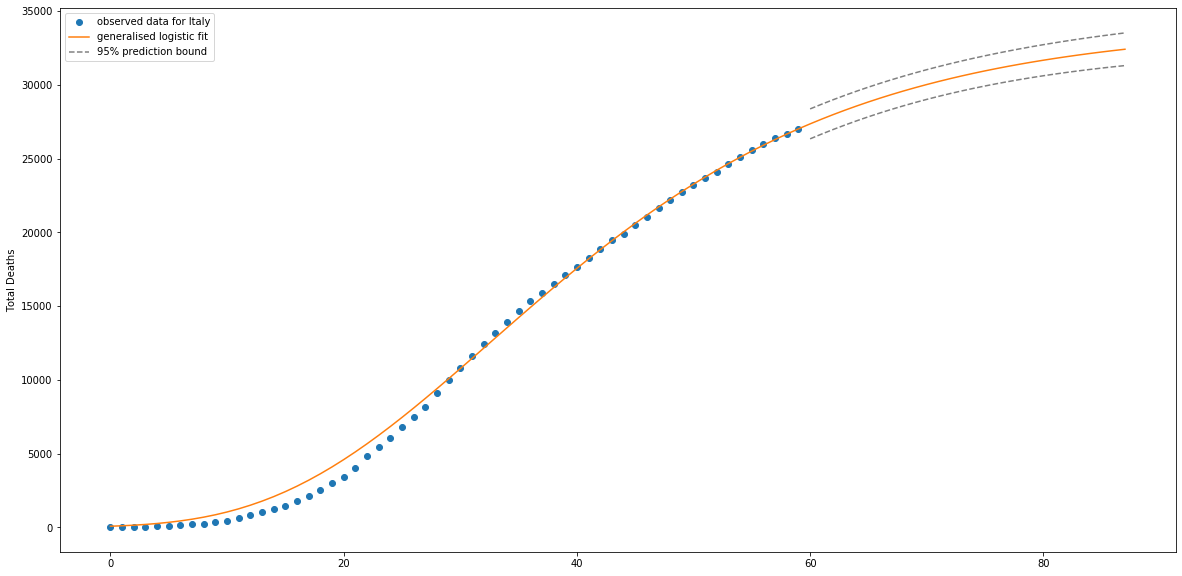

In [27]:
# plot the predictions with the prediction intervals
# NB: the interval GREATLY UNDERESTIMATES UNCERTAINTY 
# (since it assumes that the model is correct, which is almost certainly isn't)

plt.figure(figsize=(20,10))
plt.plot(xdata, ydata, 'o', label='observed data for Italy')
n = len(ydata)
xpred = range(n+28)
ypred = generalised_logistic(xpred, *popt)
plt.plot(xpred, ypred, label='generalised logistic fit')
plt.plot(xpred[n:], ypred[n:]+intervals[n:], '--', color='grey', label='95% prediction bound')
plt.plot(xpred[n:], ypred[n:]-intervals[n:], '--', color='grey')
plt.legend(loc='best')
plt.ylabel("Total Deaths");

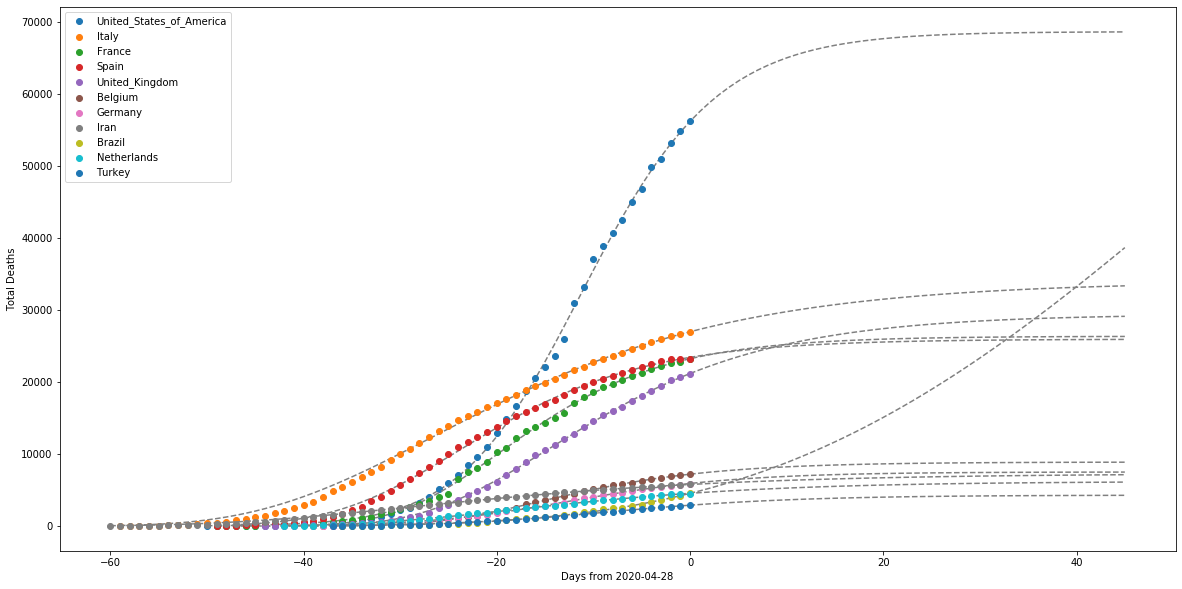

In [28]:
# plot other countries with high fatality counts

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,:12]:
    if col=='China' :  # problem with recent china data, so skip it
        continue 
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    p0=[2*ydata.max(), 10, .1, 0.0, 1.0]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=0);

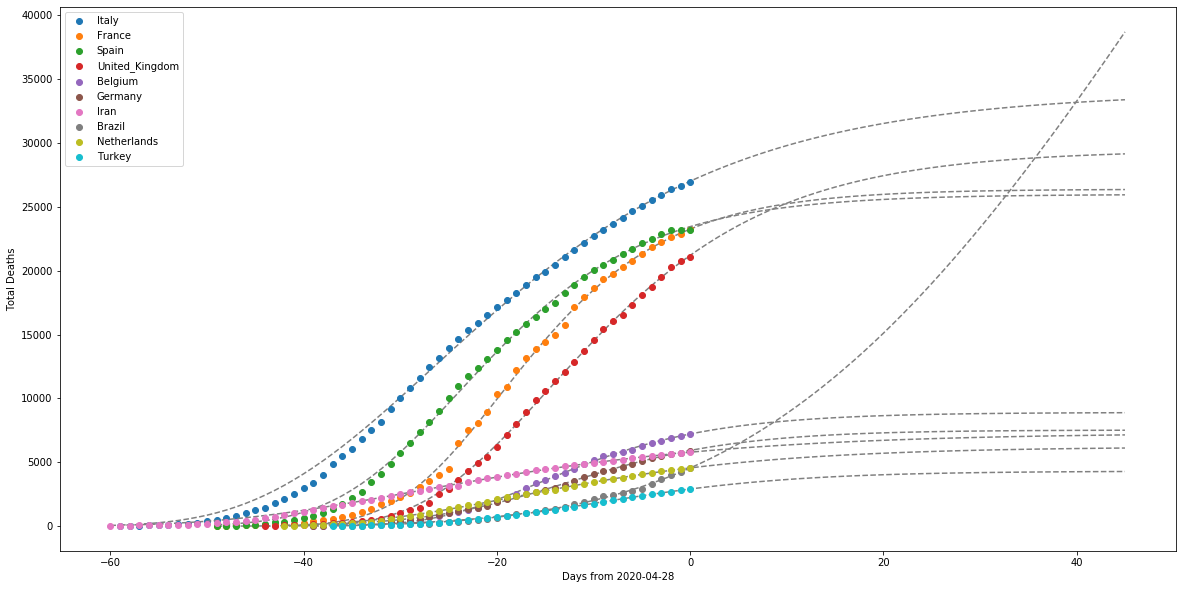

In [29]:
# remove the US to zoom in the y-axis on the previous plot

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,1:12]:
    if col=='China' :  # problem with recent china data
         continue      # so skip it
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    p0=[2*ydata.max(), 10, .1, 0.0, 1.0]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
#plt.ylim([0,30000])
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=0);

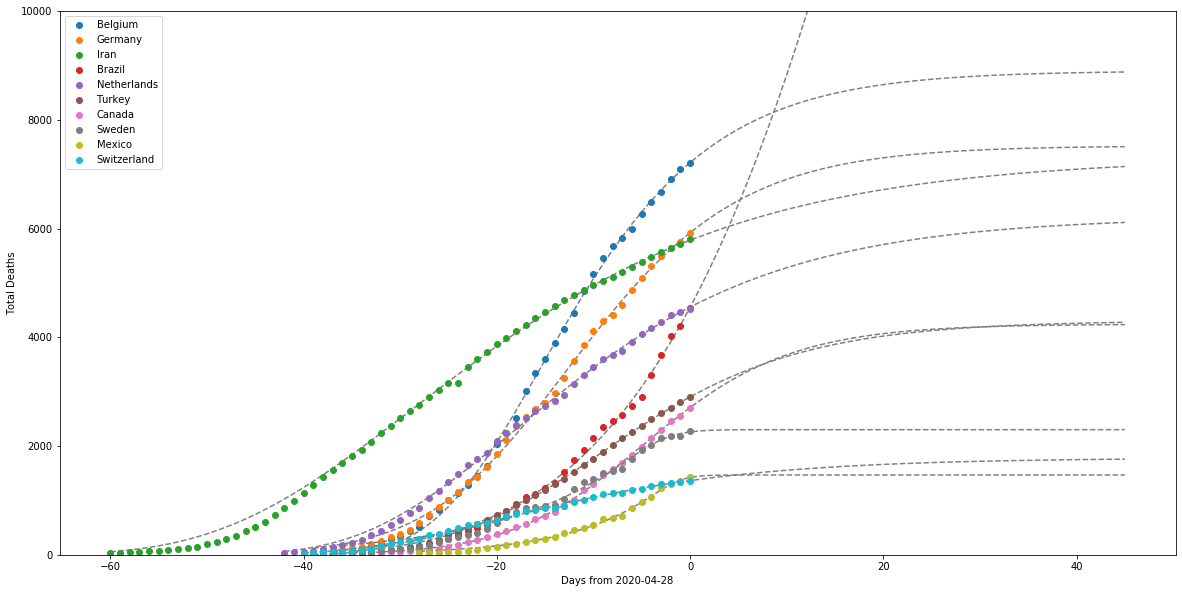

In [30]:
# remove top 5 to zoom in further the y-axis

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,5:16]:
    if col=='China' :  # problem with recent china data
         continue      # so skip it
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    p0=[2*ydata.max(), 10, .1, 0.0, 1.0]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.ylim([0,10000])
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=0);

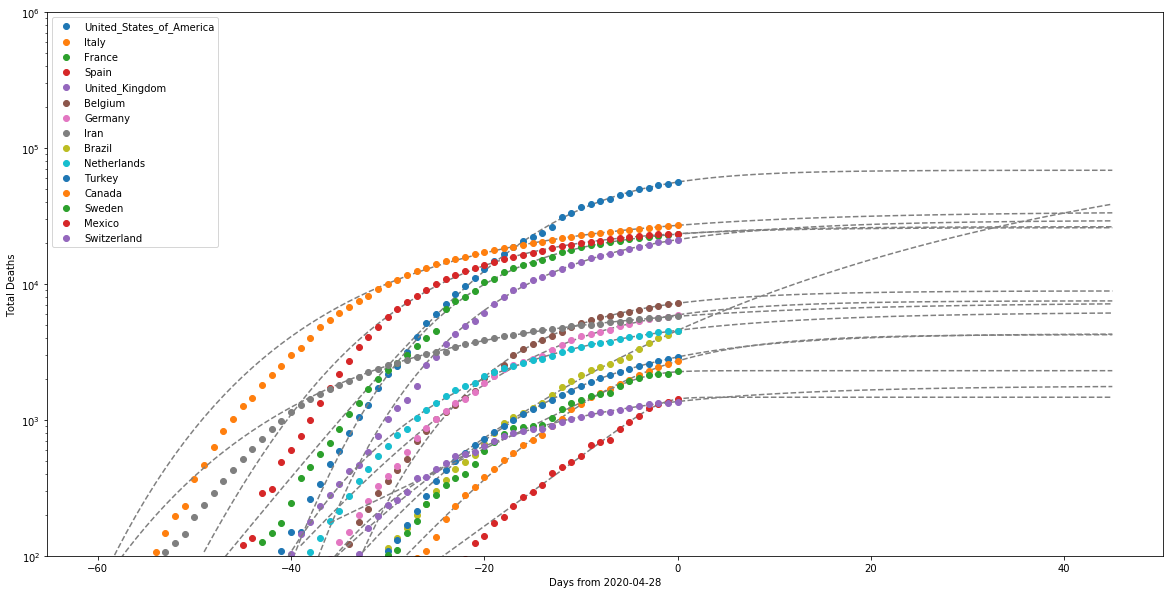

In [31]:
# log scale on the y-axis

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,:16]:
    if col=='China' :  # problem with recent china data, so skip it
        continue 
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    p0=[2*ydata.max(), 10, .1, 0.0, 1.0]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.yscale('log')
plt.ylim([100,1000000])
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=0);